In [1]:
 import numpy as np
#import plotly.graph_objects as go
#from ipywidgets import interact, widgets

In [2]:
 class Kernel:
    def __init__(self, sigma_f: float = 1, length: float = 1):
        self.sigma_f = sigma_f
        self.length = length

    def __call__(self, argument_1: np.array, argument_2: np.array) -> float:
        return float(self.sigma_f *
                     np.exp(-(np.linalg.norm(argument_1 - argument_2)**2) /
                            (2 * self.length**2)))

In [3]:
 # Helper function to calculate the respective covariance matrices
def cov_matrix(x1, x2, cov_function) -> np.array:
    return np.array([[cov_function(a, b) for a in x1] for b in x2])

In [4]:
class GPR:
    def __init__(self,
                 data_x: np.array,
                 data_y: np.array,
                 covariance_function=Kernel(),
                 white_noise_sigma: float = 0):
        self.noise = white_noise_sigma
        self.data_x = data_x
        self.data_y = data_y
        self.covariance_function = covariance_function

        # Store the inverse of covariance matrix of input (+ machine epsilon on diagonal) since it is needed for every prediction
        self._inverse_of_covariance_matrix_of_input = np.linalg.inv(
            cov_matrix(data_x, data_x, covariance_function) +
            (3e-7 + self.noise) * np.identity(len(self.data_x)))

        self._memory = None

    # function to predict output at new input values. Store the mean and covariance matrix in memory.

    def predict(self, at_values: np.array) -> np.array:
        k_lower_left = cov_matrix(self.data_x, at_values,
                                  self.covariance_function)
        k_lower_right = cov_matrix(at_values, at_values,
                                   self.covariance_function)

        # Mean.
        mean_at_values = np.dot(
            k_lower_left,
            np.dot(self.data_y,
                   self._inverse_of_covariance_matrix_of_input.T).T).flatten()

        # Covariance.
        cov_at_values = k_lower_right - \
            np.dot(k_lower_left, np.dot(
                self._inverse_of_covariance_matrix_of_input, k_lower_left.T))

        # Adding value larger than machine epsilon to ensure positive semi definite
        cov_at_values = cov_at_values + 3e-7 * np.ones(
            np.shape(cov_at_values)[0])

        var_at_values = np.diag(cov_at_values)

        self._memory = {
            'mean': mean_at_values,
            'covariance_matrix': cov_at_values,
            'variance': var_at_values
        }
        return mean_at_values

In [5]:
 x_values = np.array([0, 0.3, 1, 3.1, 4.7,9.1])

y_values = np.array([1, 0, 1.4, 0, -1.2,1.7])

In [6]:
 model = GPR(x_values, y_values)

In [7]:
 x = np.arange(-1,7,0.1)

In [8]:
mean = model.predict(x)

In [9]:
import matplotlib.pyplot as plt

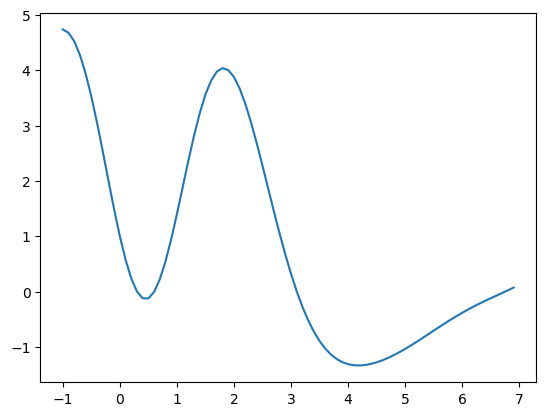

In [10]:
plt.plot(x,mean)

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('sinusoids_with_noise.csv')

In [14]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,0,0.800674,0.899618,0.602021,1.763446,0.951195,1.140446,1.299038,0.795086,1.509921,...,-0.781572,-0.480805,-0.407269,-0.471782,-0.364897,0.140118,-0.612874,0.274055,0.503651,1.237840
1,1,0.975304,1.271223,0.753665,0.669106,0.436428,0.943152,0.469294,-0.100566,-0.286567,...,0.296516,0.487481,0.543151,0.840015,0.823977,1.292025,1.145815,0.703182,1.340193,0.906893
2,2,0.179184,1.268467,0.733327,0.170125,0.606087,-0.232737,0.042157,-0.305324,-0.617169,...,0.933990,1.109160,0.800715,1.227815,1.198505,0.863232,0.751248,0.602362,0.939730,1.684402
3,3,-0.900621,-0.845678,-1.199384,-0.941751,-1.443515,-1.310281,-0.952426,-0.305865,0.024826,...,0.724382,0.308100,0.467742,0.469966,-0.043427,0.051961,-0.043954,-0.223435,-1.101287,-0.333395
4,4,0.226343,0.386882,0.580034,0.618936,0.421821,0.014068,-0.501827,-0.095706,-0.036292,...,0.885529,0.671010,0.678576,0.801546,1.017882,0.603359,1.445725,1.062498,1.737948,1.237580


In [15]:
df = df.drop(df.columns[0], axis=1)

In [16]:
lis = df.values.tolist()

In [17]:
t = np.arange(0,len(lis[4]),1)

In [18]:
model = GPR(t, lis[4])

In [21]:
mean = model.predict(t)

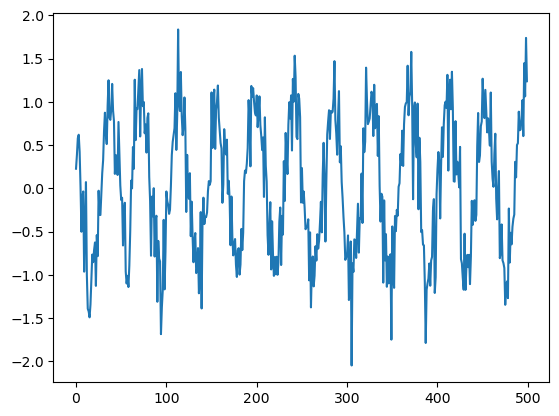

In [22]:
plt.plot(t,mean)

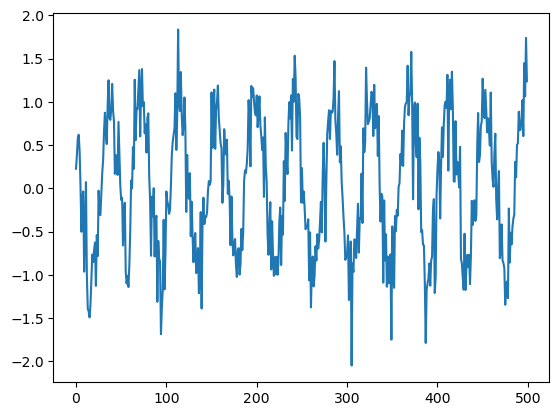

In [23]:
plt.plot(t,lis[4])